# Introduction to Python Day 2
## Workbook Contents <a id = 'cont'></a>
1. [Example - Web Scraping](#1)
2. [Example - Mars weather API](#2)
3. [Case study - Retrieve JSON data from API](#3)
4. [Example - Basic matplotlib](#4)
5. [Case study - Free choice visualisation](#5)
6. [Exercise - DataFrame to SQL](#6)

## 1. Example - Web scraping<a id = '1'></a>
[Back to contents](#cont)


In [3]:
# required modules
import requests

#a url we are interested in
test_url = r'https://www.ft.com/'

# use requests module to send a request
page = requests.get(test_url)

# check the status code of the request (starting with 2 is good, 4& 5 are bad..)
page.status_code

200

In [5]:
# check the first chunk of html code that was returned
page.text[0:600]

'<!DOCTYPE html><html lang="en-GB" class="no-js core o-typography--loading-sans o-typography--loading-sans-bold o-typography--loading-display o-typography--loading-display-bold" data-o-component="o-typography" style="overflow-x:hidden;background-color:#fff1e5;color:#33302e"><head><meta charSet="utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=edge"/><meta name="viewport" content="width=device-width, initial-scale=1"/><title>Financial Times</title><meta name="description" content="News, analysis and comment from the Financial Times, the world&#x27;s leading global business publication"/><m'

In [6]:
from bs4 import BeautifulSoup

# use beautiful soup to format this
soup = BeautifulSoup(page.text, 'html.parser')
# friendly screen print format
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js core o-typography--loading-sans o-typography--loading-sans-bold o-typography--loading-display o-typography--loading-display-bold" data-o-component="o-typography" lang="en-GB" style="overflow-x:hidden;background-color:#fff1e5;color:#33302e">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Financial Times
  </title>
  <meta content="News, analysis and comment from the Financial Times, the world's leading global business publication" name="description"/>
  <meta content="index,follow,max-snippet:200,max-image-preview:large" name="robots"/>
  <meta content="4-t8sFaPvpO5FH_Gnw1dkM28CQepjzo8UjjAkdDflTw" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context":"http://schema.org","@type":"WebSite","name":"Financial Times","alternateName":"FT.com","url":"http://www.ft.com"}
  </script>
  <meta content="8

In [8]:
# looks better - now let's look for certain characteristics
# e.g. I know from investigating that linked headlines are tagged with <a>
# and class = 'js_teaser-heading-link

# let's find all instances like this:
found_list = soup.find_all('a', class_ = 'js-teaser-heading-link')

# list comprehension to create a list of just headline text
headline_list = [i.contents[0] for i in found_list]

# use pprint module to nicely print this list
from pprint import pprint
pprint(headline_list)


['Trump’s Northern Ireland envoy issues border warning',
 'The future of the university in the age of Covid',
 'Coronavirus latest: Roche says its drug lowers ventilator use among Covid-19 '
 'patients',
 'UK government refuses to rule out second national Covid lockdown',
 'Nvidia chief pledges ‘legally binding’ commitments to UK for Arm',
 'ByteDance proposes US IPO for TikTok to woo White House',
 'Snowflake’s skyrocketing IPO has echoes of the dotcom boom',
 'Biden struggles to close enthusiasm gap with Latino voters ',
 'Can you put a number on it? How to understand the world',
 'Investors vent their frustration over Fed’s balance sheet inertia',
 'LSE in exclusive talks with Euronext over Borsa Italiana sale',
 'China’s strengthening currency heads for best week in 10 months ',
 'CaixaBank and Bankia strike deal to create Spain’s biggest lender',
 'Bolivia’s interim leader pulls out of presidential race',
 'Coronavirus: can city gyms survive? ',
 'UK retail sales rise for fourth c

Let's put the list in a <code>DataFrame</code> - so we can manipulate it more easily

In [11]:
import pandas as pd
ft_df = pd.DataFrame(headline_list)
ft_df

ft_df[ft_df.iloc[:,0].str.contains('covid|coronavirus', case = False, regex = True)]

,0
1,The future of the university in the age of Covid
2,Coronavirus latest: Roche says its drug lowers...
3,UK government refuses to rule out second natio...
14,Coronavirus: can city gyms survive?
17,Coronavirus tracked: the latest figures as cou...
18,Positive results for 90-minute Covid-19 test
20,Queen set for financial blow from coronavirus ...
22,Bank of England warns coronavirus resurgence t...
24,Coronavirus tracked: the latest figures as cou...
28,Moderna signals slower timeline for Covid-19 v...


## 2. Example - Mars weather API<a id = '2'></a>
[Back to contents](#cont)


In [12]:
import requests

# using bare url with key embedded
url = 'https://api.nasa.gov/insight_weather/?api_key=LtPq1YXjShLrSdmJtYPe0XANbCnTRhrK5vfK0sls&feedtype=json'

# make the request and store in response object
response = requests.get(url)

#check status code
response.status_code

200

In [13]:
# look at the data we have returned
response.json() 

{'638': {'AT': {'av': -62.533, 'ct': 346628, 'mn': -94.696, 'mx': -14.912},
  'First_UTC': '2020-09-11T18:07:37Z',
  'Last_UTC': '2020-09-12T18:47:11Z',
  'PRE': {'av': 771.608, 'ct': 171165, 'mn': 741.5358, 'mx': 791.1728},
  'Season': 'summer',
  'WD': {'most_common': None}},
 '639': {'AT': {'av': -61.025, 'ct': 313246, 'mn': -95.619, 'mx': -10.376},
  'First_UTC': '2020-09-12T18:47:12Z',
  'HWS': {'av': 5.129, 'ct': 153988, 'mn': 0.218, 'mx': 16.602999999999998},
  'Last_UTC': '2020-09-13T19:26:46Z',
  'PRE': {'av': 770.987, 'ct': 156008, 'mn': 740.6317, 'mx': 791.404},
  'Season': 'summer',
  'WD': {'0': {'compass_degrees': 0.0,
    'compass_point': 'N',
    'compass_right': 0.0,
    'compass_up': 1.0,
    'ct': 7168},
   '1': {'compass_degrees': 22.5,
    'compass_point': 'NNE',
    'compass_right': 0.382683432365,
    'compass_up': 0.923879532511,
    'ct': 3008},
   '10': {'compass_degrees': 225.0,
    'compass_point': 'SW',
    'compass_right': -0.707106781187,
    'compass_up'

In [14]:
# looking at the data there are sol_keys which indicate which 'Martian day'
response.json()["sol_keys"]

['638', '639', '640', '641', '642', '643']

In [15]:
# looks good - let's try to loop over the keys and flatten each day
import pandas as pd

day_dict = {}
# iterate over the key for each day
for day in response.json()['sol_keys']:
    # get data for that day
    day_data = response.json()[day]
    # flatten data for that day and put in dataframe
    df = pd.json_normalize(day_data)
    # store df in dictionary
    day_dict[day] = df
    
    #or in one line
    #day_dict[day] = pd.json_normalize(response.json()[day])

# join our dicts together
pd.concat(day_dict)
    

,,First_UTC,Last_UTC,Season,AT.av,AT.ct,AT.mn,AT.mx,PRE.av,PRE.ct,PRE.mn,...,WD.9.compass_degrees,WD.9.compass_point,WD.9.compass_right,WD.9.compass_up,WD.9.ct,WD.most_common.compass_degrees,WD.most_common.compass_point,WD.most_common.compass_right,WD.most_common.compass_up,WD.most_common.ct
638,0,2020-09-11T18:07:37Z,2020-09-12T18:47:11Z,summer,-62.533,346628,-94.696,-14.912,771.608,171165,741.5358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,0,2020-09-12T18:47:12Z,2020-09-13T19:26:46Z,summer,-61.025,313246,-95.619,-10.376,770.987,156008,740.6317,...,202.5,SSW,-0.382683,-0.92388,7068.0,292.5,WNW,-0.92388,0.382683,42654.0
640,0,2020-09-13T19:26:47Z,2020-09-14T20:06:21Z,summer,-68.531,229154,-94.833,-7.378,773.271,113883,741.9242,...,202.5,SSW,-0.382683,-0.92388,2865.0,292.5,WNW,-0.92388,0.382683,37134.0
641,0,2020-09-14T20:06:22Z,2020-09-15T20:45:56Z,summer,-62.181,345361,-95.412,-12.612,770.300,171832,739.8041,...,202.5,SSW,-0.382683,-0.92388,3010.0,292.5,WNW,-0.92388,0.382683,68845.0
642,0,2020-09-15T20:45:57Z,2020-09-16T21:25:32Z,summer,-62.253,177556,-94.696,-15.569,769.844,88776,740.1758,...,202.5,SSW,-0.382683,-0.92388,6.0,292.5,WNW,-0.92388,0.382683,35000.0
643,0,2020-09-16T21:25:33Z,2020-09-17T22:05:07Z,summer,-61.952,346470,-95.654,-14.994,768.562,173348,738.8142,...,202.5,SSW,-0.382683,-0.92388,50.0,292.5,WNW,-0.92388,0.382683,78968.0


## 3. Case Study - retrieve JSON data from API<a id = '3'></a>
[Back to contents](#cont)

<b>Requirement</b>

Retrieve COVID data for the UK from the following url: https://api.covid19api.com/dayone/country/united-kingdom and format it into a DataFrame.

Use the <code>pandas</code> and <code>requests</code> modules. You shouldn't need the <code>json</code> module

API documentation can be found here https://documenter.getpostman.com/view/10808728/SzS8rjbc. You can tweak the URL if you want to return a different dataset - just follow the rules listed here.

In [ ]:
# your code goes here

<b>Answer</b>

In [40]:
import requests
import pandas as pd

url = r'https://api.covid19api.com/dayone/country/united-kingdom'
response = requests.get(url)

if response.status_code == 200:
    covid_df = pd.read_json(response.text)
    print('Success')
else:
    print('Request failed')
    print(response.reason)
    

Success


## 4. Example - basic matplotlib <a id = '4'></a>
[Back to contents](#cont)

ValueError: Unrecognized marker style 'm'

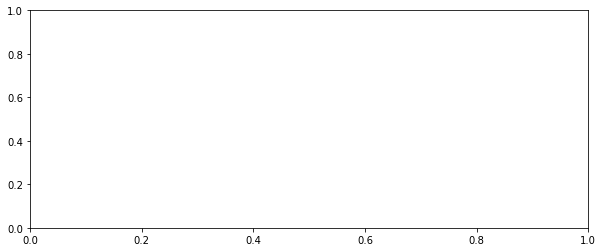

In [37]:
# The following line is only for jupyter notebooks:
%matplotlib inline
# inline doesn't work in an ide for example
"""
Simple demo of a scatter plot.
"""
import numpy as np
import matplotlib.pyplot as plt

# generate some random x,y coords
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
z = np.random.rand(N)
colors = np.random.rand(N)


# 0 to 15 point radiuses
# point area based on random
area = np.pi * (15 * np.random.rand(N))**2

#optional step define figure for control on size etc
fig, ax = plt.subplots(figsize = (10,4))

# product plot
ax.scatter(x, y, z, c=colors, marker = 'm')

# display plot
plt.show


## 5. Case study - explore visualisations<a id = '5'></a>
[Back to contents](#cont)

<b>Requirement</b>

Pick a module which we discussed and make a visualisation using the UK COVID dataset retrieved earlier. Matplotlib is easiest - but other modules may produce better visualisations. Make liberal use of google to determine how to make the type of plot you want!

In [ ]:
# your code here

<b>Answer</b>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Country      2091 non-null   object             
 1   CountryCode  2091 non-null   object             
 2   Province     2091 non-null   object             
 3   City         2091 non-null   object             
 4   CityCode     2091 non-null   object             
 5   Lat          2091 non-null   float64            
 6   Lon          2091 non-null   float64            
 7   Confirmed    2091 non-null   int64              
 8   Deaths       2091 non-null   int64              
 9   Recovered    2091 non-null   int64              
 10  Active       2091 non-null   int64              
 11  Date         2091 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(5)
memory usage: 196.2+ KB


,Lat,Lon,Confirmed,Deaths,Recovered,Active
count,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000
mean,26.021483,-42.356475,21102.853180,3392.911526,102.095170,18154.230033
std,27.402103,31.226079,73447.217826,10726.458311,148.902582,63572.973243
min,-51.800000,-81.250000,1.000000,0.000000,0.000000,0.000000
25%,18.220000,-64.750000,11.000000,0.000000,3.000000,0.000000
50%,21.690000,-62.190000,99.000000,1.000000,13.000000,5.000000
75%,49.370000,-4.550000,336.000000,23.000000,159.500000,39.000000
max,55.380000,-2.360000,381614.000000,43995.000000,575.000000,339909.000000


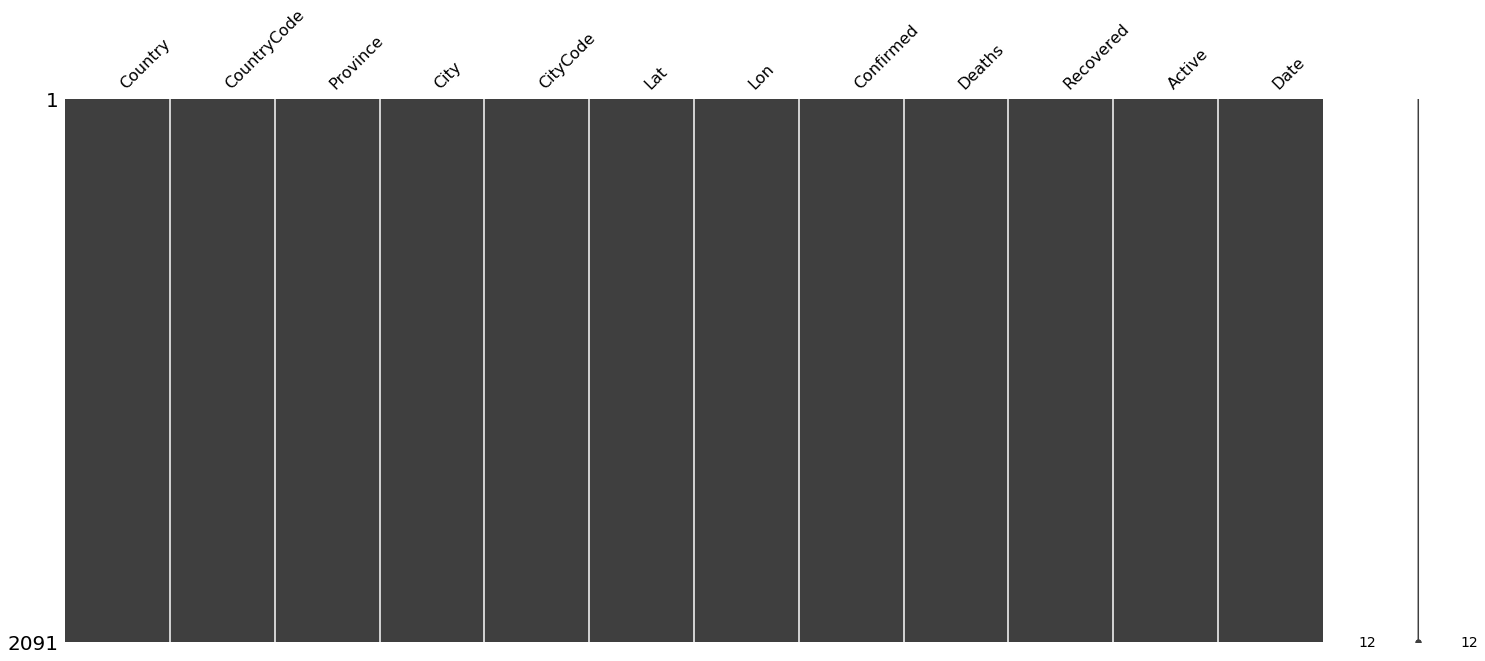

In [41]:
# No specific answer but here is an example for lineplots based on province
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# some prelim checks
import missingno as mn

mn.matrix(covid_df)
covid_df.info()
covid_df.describe()


In [45]:
# need to change date format
fmt_covid_df = covid_df
fmt_covid_df['Date'] = pd.DatetimeIndex(fmt_covid_df['Date']).date


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026106B09648>,
      dtype=object)

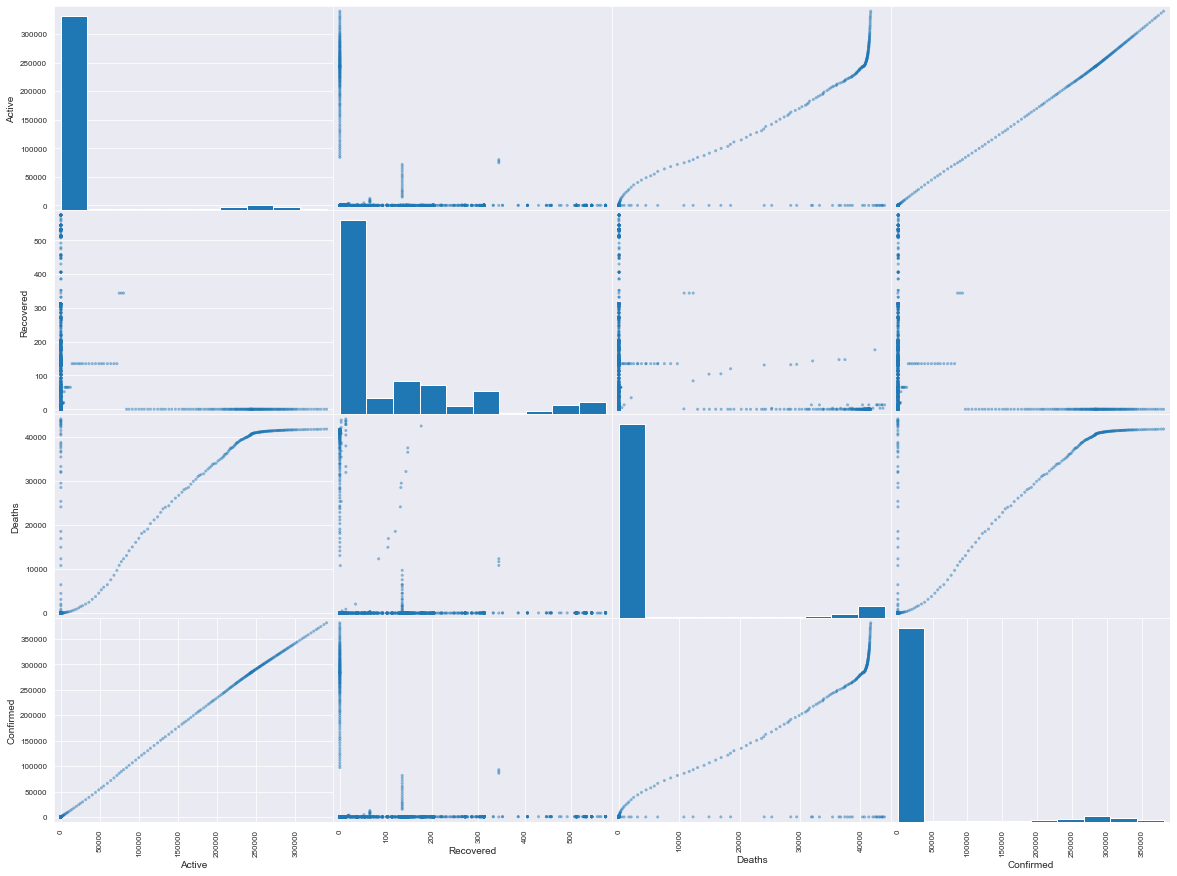

In [51]:
# look at some of the relationships
pd.plotting.scatter_matrix(fmt_covid_df[['Active','Recovered','Deaths','Confirmed']], figsize = (20,15))

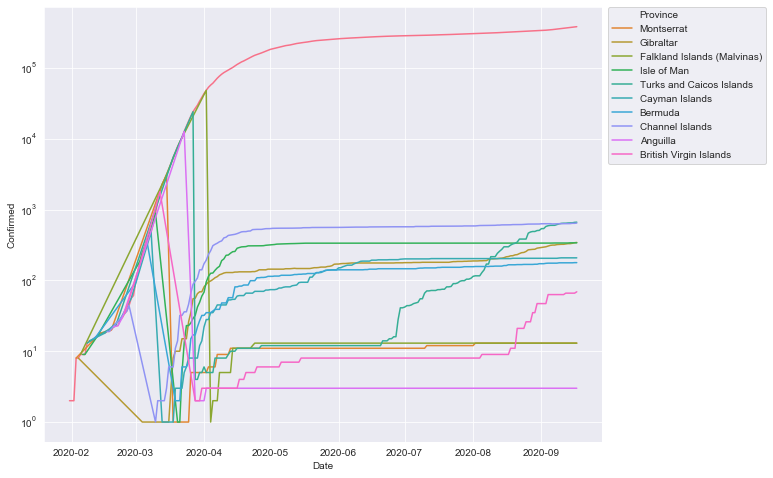

In [46]:
# declare figure
fig, ax = plt.subplots(figsize=(10,8))
# aesthetic style
sns.set_style('darkgrid')
# do the plot
ax = sns.lineplot(data = fmt_covid_df, y = 'Confirmed', x = 'Date', ci = None, hue = 'Province', ax = ax)
# make logarithmic y axis so we can see all on one scale
ax.set(yscale = 'log')
# move legend outside plot
ax.legend(bbox_to_anchor = (1.01,1), borderaxespad=0)

Looks very odd - can see that many provinces have huge initial numbers which then decrease? Should be impossible as cumulative.
Investigate by looking at biggest values of non mainland provinces

In [48]:
fmt_covid_df[fmt_covid_df['Province']!=''].sort_values(by = 'Confirmed', ascending = False)

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
239,United Kingdom,GB,Falkland Islands (Malvinas),,,-51.80,-59.52,48263,3748,135,44380,2020-04-02
182,United Kingdom,GB,Turks and Caicos Islands,,,21.69,-71.80,24017,1162,135,22720,2020-03-27
147,United Kingdom,GB,Anguilla,,,18.22,-63.07,12668,359,65,12244,2020-03-23
142,United Kingdom,GB,Anguilla,,,18.22,-63.07,10333,285,65,9983,2020-03-22
134,United Kingdom,GB,Falkland Islands (Malvinas),,,-51.80,-59.52,8957,250,65,8642,2020-03-21
...,...,...,...,...,...,...,...,...,...,...,...,...
101,United Kingdom,GB,Gibraltar,,,36.14,-5.35,1,0,1,0,2020-03-15
156,United Kingdom,GB,Montserrat,,,16.74,-62.19,1,0,0,1,2020-03-24
99,United Kingdom,GB,Cayman Islands,,,19.31,-81.25,1,0,0,1,2020-03-15
167,United Kingdom,GB,Montserrat,,,16.74,-62.19,1,0,0,1,2020-03-25


In [47]:
fmt_covid_df[(fmt_covid_df['Province']=='') & (covid_df['Confirmed'] == 48263)]

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
233,United Kingdom,GB,,,,55.38,-3.44,48263,3782,135,44346,2020-04-02


Looks like provinces were initially recorded at same value as mainland due to no separate stats - dedupe below

In [49]:
fmt_covid_df = fmt_covid_df.groupby(['Date','Confirmed']).agg('min').reset_index()
fmt_covid_df

,Date,Confirmed,Country,CountryCode,Province,City,CityCode,Lat,Lon,Deaths,Recovered,Active
0,2020-01-31,2,United Kingdom,GB,,,,55.38,-3.44,0,0,2
1,2020-02-01,2,United Kingdom,GB,,,,55.38,-3.44,0,0,2
2,2020-02-02,2,United Kingdom,GB,,,,55.38,-3.44,0,0,2
3,2020-02-03,8,United Kingdom,GB,,,,16.74,-62.19,0,0,8
4,2020-02-04,8,United Kingdom,GB,,,,36.14,-5.35,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1940,2020-09-17,339,United Kingdom,GB,Isle of Man,,,54.24,-4.55,24,312,3
1941,2020-09-17,343,United Kingdom,GB,Gibraltar,,,36.14,-5.35,0,313,30
1942,2020-09-17,644,United Kingdom,GB,Channel Islands,,,49.37,-2.36,48,575,21
1943,2020-09-17,663,United Kingdom,GB,Turks and Caicos Islands,,,21.69,-71.80,5,565,93


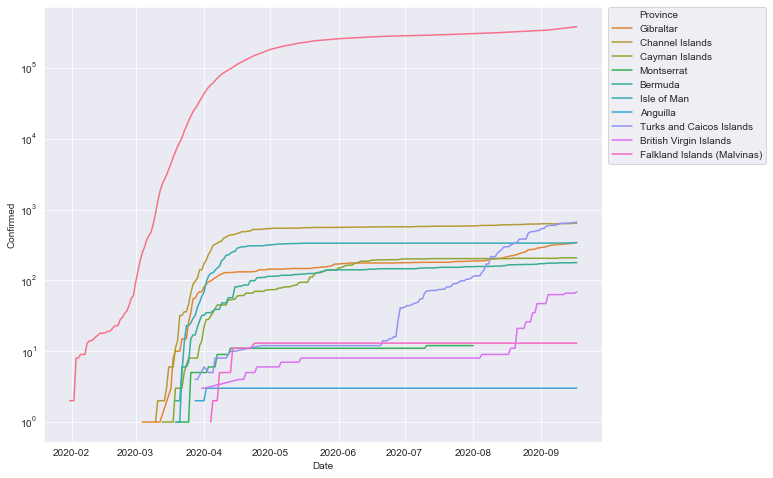

In [50]:
# try plot again

# declare figure
fig, ax = plt.subplots(figsize=(10,8))
# aesthetic style
sns.set_style('darkgrid')
# do the plot
ax = sns.lineplot(data = fmt_covid_df, y = 'Confirmed', x = 'Date', ci = None, hue = 'Province', ax = ax)
# make logarithmic y axis so we can see all on one scale
ax.set(yscale = 'log')
# move legend outside plot
ax.legend(bbox_to_anchor = (1.01,1), borderaxespad=0)

Let's save this figure as a python object so we can recall it at will using the <code>pickle</code> module

In [ ]:
import pickle

# with context manager
# rb is mode - need binary here not normal w for write text
with open('fig_pickle', 'wb') as f:
    pickle.dump(fig, f)

In [ ]:
# rb to read binary
with open ('fig_pickle', 'rb') as f:
    loaded_fig = pickle.load(f)
    
loaded_fig

## 6. Exercise - DataFrame to SQL<a id = '6'></a>
[Return to contents](#cont)

<b>Requirement</b>
Use the function below (which creates a SQL engine connection based on your Windows AD permissions) to push a sql table to the database using <code>.to_sql()</code>.

<b>N.B.</b>
- Do this in pairs / groups to minimise database load
- BE CAREFUL WITH TABLE NAMES - you may overwrite tables if names clash
- If you have access to a sandbox please use this, otherwise please use common sense
- You must have access to the DB through your Windows permissions or the transfer will fail

Let facilitators know if you want to be added to a sandbox and we can add you to UKVIR10322   Sandbox_JSB


In [52]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus
from sys import exit

def f_connect_sql(server: str, db: str, driver: str = '{ODBC Driver 17 for SQL Server}', dbapi: str = 'mssql+pyodbc:///?odbc_connect='):
    ver_list = ['17','13.1','13','11']
    for i, v in enumerate(ver_list):
        try:
            conn_string = 'DRIVER={ODBC Driver %s for SQL Server};SERVER=%s;DATABASE=%s;Trusted_Connection=Yes;TrustServerCertificate=No;APP={Microsoft® Windows® Operating System}' % (v, server, db)
            conn_url = quote_plus(conn_string)
            engine = create_engine(dbapi+conn_url, echo=False, fast_executemany = True)
            engine.execute('SELECT TOP 1 * FROM sys.Tables')
            print("\nSQL connection succeeded with driver 'ODBC Driver %s for SQL Server'..." %v)
            break
        except:
            if i == len(ver_list) -1:
                print("\nSearch for SQL driver failed - exiting. Refer to additional errors below:\n")
                exit()
            else:
                print("\nSearch for driver 'ODBC Driver %s for SQL Server failed' - reverting to next..." %v)
            
    return engine

In [53]:
server_name = 'UKVIR10322'
db_name = 'Sandbox_JSB'
engine = f_connect_sql(server_name, db_name)


SQL connection succeeded with driver 'ODBC Driver 17 for SQL Server'...


<b>Answer</b>

In [56]:
fmt_covid_df.to_sql('covid_data',engine, if_exists = 'replace')

Now check in SSMS...

Now load it back to test functionality!

In [57]:
sql_df = pd.read_sql('covid_data',engine)
sql_df

,index,Date,Confirmed,Country,CountryCode,Province,City,CityCode,Lat,Lon,Deaths,Recovered,Active
0,0,2020-01-31,2,United Kingdom,GB,,,,55.38,-3.44,0,0,2
1,1,2020-02-01,2,United Kingdom,GB,,,,55.38,-3.44,0,0,2
2,2,2020-02-02,2,United Kingdom,GB,,,,55.38,-3.44,0,0,2
3,3,2020-02-03,8,United Kingdom,GB,,,,16.74,-62.19,0,0,8
4,4,2020-02-04,8,United Kingdom,GB,,,,36.14,-5.35,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,1940,2020-09-17,339,United Kingdom,GB,Isle of Man,,,54.24,-4.55,24,312,3
1941,1941,2020-09-17,343,United Kingdom,GB,Gibraltar,,,36.14,-5.35,0,313,30
1942,1942,2020-09-17,644,United Kingdom,GB,Channel Islands,,,49.37,-2.36,48,575,21
1943,1943,2020-09-17,663,United Kingdom,GB,Turks and Caicos Islands,,,21.69,-71.80,5,565,93


Or if we want to load with a custom SQL query...

In [58]:
sql_df = pd.read_sql('SELECT TOP 10 * FROM covid_data WHERE [Lat] = 55.38',engine)
sql_df

,index,Date,Confirmed,Country,CountryCode,Province,City,CityCode,Lat,Lon,Deaths,Recovered,Active
0,0,2020-01-31,2,United Kingdom,GB,,,,55.38,-3.44,0,0,2
1,1,2020-02-01,2,United Kingdom,GB,,,,55.38,-3.44,0,0,2
2,2,2020-02-02,2,United Kingdom,GB,,,,55.38,-3.44,0,0,2
3,10,2020-02-10,14,United Kingdom,GB,,,,55.38,-3.44,0,0,14
4,29,2020-02-29,61,United Kingdom,GB,,,,55.38,-3.44,0,8,53
5,36,2020-03-05,294,United Kingdom,GB,,,,55.38,-3.44,0,8,286
6,44,2020-03-09,629,United Kingdom,GB,,,,55.38,-3.44,3,18,608
7,49,2020-03-11,1298,United Kingdom,GB,,,,55.38,-3.44,7,18,1273
8,64,2020-03-16,3684,United Kingdom,GB,,,,55.38,-3.44,65,20,3599
9,68,2020-03-17,4452,United Kingdom,GB,,,,55.38,-3.44,82,52,4318
